# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Michael Kuswanto
- **Email:** michaelkus83@gmail.com
- **ID Dicoding:** michael_kuswanto_24

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?
2. Faktor cuaca apa yang paling memengaruhi penggunaan sepeda?
3. Bagaimana tren penggunaan sepeda berdasarkan musim (season)?
4. Pada jam berapa penggunaan sepeda paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Untuk tabel `day_df` tidak memiliki data yang duplikat ataupun kosong, tetapi terdapat kesalahan tipe data
- Untuk tabel `hour_df` tidak memiliki data yang duplikat ataupun kosong, tetapi terdapat kesalahan tipe data

### Cleaning Data

#### Melakukan cleaning pada tabel `day_df`

menghapus kolom `instant` karena hanya sebuah indeks otomatis

In [12]:
day_df.drop(columns=['instant'], inplace=True)

ubah tipe data `dteday` menjadi datetime

In [13]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Mengubah data `weekday` menjadi nama hari

In [14]:
day_df['weekday'] = day_df['dteday'].dt.day_name()

Mengubah data `mnth` menjadi nama bulan

In [15]:
day_df['mnth'] = day_df['dteday'].dt.month_name()

mengubah `season` menjadi sesuai yang ada di deskripsi sumber

In [16]:
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\4180407938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)


mengubah `yr` menjadi sesuai yang ada di deskripsi sumber

In [17]:
day_df.yr.replace((0,1), (2011,2012), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\2964333323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.yr.replace((0,1), (2011,2012), inplace=True)


mengubah `weathersit` menjadi sesuai yang ada di deskripsi sumber

In [18]:
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\4118174157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)


mengubah `holiday` menjadi sesuai yang ada di deskripsi sumber

In [19]:
day_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\1622456750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)


mengubah `workingday` menjadi sesuai yang ada di deskripsi sumber

In [20]:
day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\920903413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)


mengubah `temp`, `atemp`, `hum`, `windspeed` menjadi sesuai yang ada di deskripsi sumber

In [21]:
day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['hum'] = day_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67

tampilkan data yang telah diubah

In [22]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,January,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,January,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,January,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,January,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Melakukan cleaning pada tabel `hour_df`

menghapus kolom `instant` karena hanya sebuah indeks otomatis

In [23]:
hour_df.drop(columns=['instant'], inplace=True)

ubah tipe data `dteday` menjadi datetime

In [24]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Mengubah data `weekday` menjadi nama hari

In [25]:
hour_df['weekday'] = hour_df['dteday'].dt.day_name()

Mengubah data `mnth` menjadi nama bulan

In [26]:
hour_df['mnth'] = hour_df['dteday'].dt.month_name()

mengubah `season` menjadi sesuai yang ada di deskripsi sumber

In [27]:
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\3573202371.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)


mengubah `yr` menjadi sesuai yang ada di deskripsi sumber

In [28]:
hour_df.yr.replace((0,1), (2011,2012), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\692301259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.yr.replace((0,1), (2011,2012), inplace=True)


mengubah `weathersit` menjadi sesuai yang ada di deskripsi sumber

In [29]:
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\2925101222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)


mengubah `holiday` menjadi sesuai yang ada di deskripsi sumber

In [30]:
hour_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\2418976571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.holiday.replace((0,1), ('No', 'Yes'), inplace=True)


mengubah `workingday` menjadi sesuai yang ada di deskripsi sumber

In [31]:
hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1828\2431861626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)


mengubah `temp`, `atemp`, `hum`, `windspeed` menjadi sesuai yang ada di deskripsi sumber

In [32]:
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

tampilkan data yang telah diubah

In [33]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


#### Menggabungkan data `Day.csv` dan `Hour.csv`

In [34]:
bike_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_daily', '_hourly'))
bike_df.head()

,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
0,2011-01-01,Spring,2011,January,No,Saturday,No,Misty,14.110847,18.18125,...,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,January,No,Saturday,No,Misty,14.110847,18.18125,...,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,January,No,Saturday,No,Misty,14.110847,18.18125,...,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,January,No,Saturday,No,Misty,14.110847,18.18125,...,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,January,No,Saturday,No,Misty,14.110847,18.18125,...,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


**Insight:**
- Mengubah type data dalam 2 tabel menjadi sesuai dengan yang ada pada sumber (kaggle)
- Menggabungkan 2 tabel menjadi satu dataset yaitu bike_df

## Exploratory Data Analysis (EDA)

### Explore ...

In [50]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dteday             17379 non-null  datetime64[ns]
 1   season_daily       17379 non-null  object        
 2   yr_daily           17379 non-null  int64         
 3   mnth_daily         17379 non-null  object        
 4   holiday_daily      17379 non-null  object        
 5   weekday_daily      17379 non-null  object        
 6   workingday_daily   17379 non-null  object        
 7   weathersit_daily   17379 non-null  object        
 8   temp_daily         17379 non-null  float64       
 9   atemp_daily        17379 non-null  float64       
 10  hum_daily          17379 non-null  float64       
 11  windspeed_daily    17379 non-null  float64       
 12  casual_daily       17379 non-null  int64         
 13  registered_daily   17379 non-null  int64         
 14  cnt_da

In [35]:
bike_df.sample(5)

,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
5281,2011-08-12,Fall,2011,August,No,Friday,Yes,Clear,29.041653,32.70210,...,Friday,Yes,Clear,27.88,31.82,51.0,0.0000,51,100,151
12186,2012-05-27,Summer,2012,May,No,Sunday,No,Clear,28.290000,32.07125,...,Sunday,No,Light_RainSnow,25.42,28.79,83.0,8.9981,31,65,96
17298,2012-12-28,Spring,2012,December,No,Friday,Yes,Misty,10.386653,12.75230,...,Friday,Yes,Misty,12.30,15.91,49.0,0.0000,74,151,225
3867,2011-06-15,Summer,2011,June,No,Wednesday,Yes,Clear,25.693347,29.38770,...,Wednesday,Yes,Clear,22.14,25.76,64.0,19.0012,0,14,14
4553,2011-07-13,Fall,2011,July,No,Wednesday,Yes,Clear,30.613347,34.47020,...,Wednesday,Yes,Light_RainSnow,26.24,28.03,94.0,8.9981,13,33,46


In [36]:
bike_df.describe(include="all")

,dteday,season_daily,yr_daily,mnth_daily,holiday_daily,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,...,weekday_hourly,workingday_hourly,weathersit_hourly,temp_hourly,atemp_hourly,hum_hourly,windspeed_hourly,casual_hourly,registered_hourly,cnt_hourly
count,17379,17379,17379.000000,17379,17379,17379,17379,17379,17379.000000,17379.000000,...,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,2,7,2,3,NaN,NaN,...,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,July,No,Saturday,Yes,Clear,NaN,NaN,...,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,16879,2512,11865,11040,NaN,NaN,...,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,NaN,NaN,NaN,NaN,20.376474,23.788756,...,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,...,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,13.940000,16.918150,...,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,20.602500,24.506100,...,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,26.889153,30.524400,...,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,35.328347,42.044800,...,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan dari data daily

In [37]:
bike_df.groupby(by='mnth_daily').agg({
    'cnt_daily': ['max', 'min', 'mean', 'sum']
})

cnt_daily                            
                 max   min         mean      sum
mnth_daily                                      
April           7460   795  4484.418928  6444110
August          7865  1115  5689.239322  8391628
December        6606   441  3411.030344  5058558
February        5062  1005  2671.260999  3582161
January         4521   431  2228.370189  3184341
July            8173  3285  5563.677419  8278752
June            8120  3767  5772.366667  8312208
March           8362   605  3709.164969  5463600
May             8294  2633  5349.774194  7960464
November        6852  1495  4245.956159  6101439
October         8156    22  5319.965541  7719270
September       8714  1842  5772.107864  8294519

mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan dari data hourly

In [38]:
bike_df.groupby(by='mnth_hourly').agg({
    'cnt_hourly': ['max', 'min', 'mean', 'sum']
})

cnt_hourly                        
                   max min        mean     sum
mnth_hourly                                   
April              822   1  187.260960  269094
August             941   1  238.097627  351194
December           759   1  142.303439  211036
February           610   1  112.865026  151352
January            559   1   94.424773  134933
July               913   1  231.819892  344948
June               900   1  240.515278  346342
March              957   1  155.410726  228920
May                873   1  222.907258  331686
November           729   1  177.335421  254831
October            963   1  222.158511  322352
September          977   1  240.773138  345991

mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca dari data daily

In [39]:
bike_df.groupby(by='weathersit_daily').agg({
    'cnt_daily': ['max', 'min', 'mean', 'sum']
})

cnt_daily                            
                       max  min         mean       sum
weathersit_daily                                      
Clear                 8714  431  4895.177083  54042755
Light_RainSnow        4639   22  1914.700855    896080
Misty                 8362  605  4062.717595  23852215

mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca dari data hourly

In [40]:
bike_df.groupby(by='weathersit_hourly').agg({
    'cnt_hourly': ['max', 'min', 'mean', 'sum']
})

cnt_hourly                         
                         max min        mean      sum
weathersit_hourly                                    
Clear                    977   1  204.869272  2338173
Heavy_RainSnow           164  23   74.333333      223
Light_RainSnow           891   1  111.579281   158331
Misty                    957   1  175.165493   795952

mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday dari data daily

In [41]:
bike_df.groupby(by='holiday_daily').agg({
    'cnt_daily': ['max', 'min', 'mean', 'sum']
})

cnt_daily                             
                    max   min         mean       sum
holiday_daily                                       
No                 8714    22  4556.906215  76916020
Yes                7403  1000  3750.060000   1875030

mengelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday dari data hourly

In [42]:
bike_df.groupby(by='holiday_hourly').agg({
    'cnt_hourly': ['max', 'min', 'mean', 'sum']
})

cnt_hourly                        
                      max min       mean      sum
holiday_hourly                                   
No                    977   1  190.42858  3214244
Yes                   712   1  156.87000    78435

mengelompokkan penyewa sepeda dengan menampilkan temp, atemp, dan hum berdasarkan season dari data daily

In [43]:
bike_df.groupby(by='season_daily').agg({
    'cnt_daily': ['max', 'min', 'mean', 'sum'],
    'temp_daily': ['max', 'min', 'mean'],
    'atemp_daily': ['max', 'min', 'mean'],
    'hum_daily': ['max', 'min', 'mean']
})

cnt_daily                              temp_daily             \
                   max   min         mean       sum        max        min   
season_daily                                                                
Fall              8714  1115  5654.093194  25420803  35.328347  19.235847   
Spring            7836   431  2635.348185  11179147  23.472500   2.424346   
Summer            8362   795  4995.253119  22024071  33.141653  10.374763   
Winter            8555    22  4765.366021  20167029  26.957500   9.054153   

                        atemp_daily                      hum_daily           \
                   mean         max       min       mean       max      min   
season_daily                                                                  
Fall          28.962815    42.04480  12.12000  32.800176   93.9565  36.0000   
Spring        12.265011    27.43085   3.95348  14.905824   94.8261   0.0000   
Summer        22.331192    37.87895  12.51695  26.027348   92.2500  25.4167   
Winter        17.348658    30.39875  11.39565  20.786888   97.2500  33.3478   

                         
                   mean  
season_daily             
Fall          63.316726  
Spring        58.134842  
Summer        62.702198  
Winter        66.712429

mengelompokkan penyewa sepeda dengan menampilkan temp, atemp, dan hum berdasarkan season dari data daily

In [44]:
bike_df.groupby(by='season_hourly').agg({
    'cnt_hourly': ['max', 'min', 'mean', 'sum'],
    'temp_hourly': ['max', 'min', 'mean'],
    'atemp_hourly': ['max', 'min', 'mean'],
    'hum_hourly': ['max', 'min', 'mean']
})

cnt_hourly                          temp_hourly         \
                     max min        mean      sum         max    min   
season_hourly                                                          
Fall                 977   1  236.016237  1061129       41.00  15.58   
Spring               801   1  111.114569   471348       29.52   0.82   
Summer               957   1  208.344069   918589       38.54   6.56   
Winter               967   1  198.868856   841613       31.16   5.74   

                         atemp_hourly                    hum_hourly        \
                    mean          max     min       mean        max   min   
season_hourly                                                               
Fall           28.962816       50.000  12.120  32.800176      100.0  16.0   
Spring         12.265012       32.575   0.000  14.905824      100.0   0.0   
Summer         22.331191       43.940   8.335  26.027347      100.0  16.0   
Winter         17.348658       34.090   7.575  20.786887      100.0  16.0   

                          
                    mean  
season_hourly             
Fall           63.316726  
Spring         58.134842  
Summer         62.702200  
Winter         66.712429

**Insight:**
- melakukan pengelompokan berdasarkan data daily
- melakukan pengelompokan berdasarkan data hourly

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan hari libur?

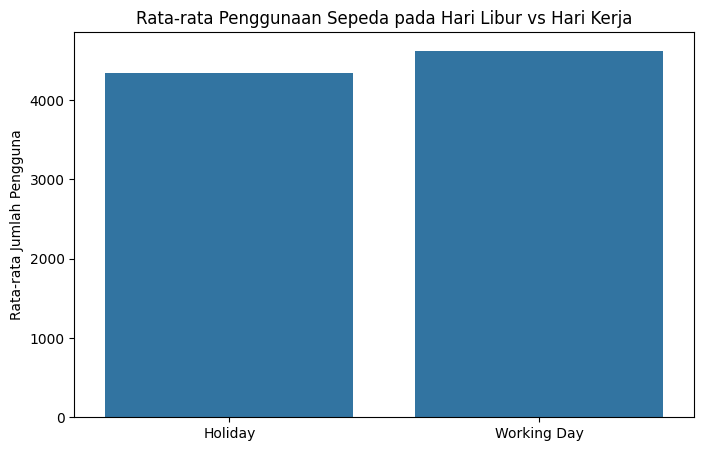

In [46]:
workingday_vs_holiday = bike_df.groupby('workingday_daily')['cnt_daily'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=['Holiday', 'Working Day'], y=workingday_vs_holiday)
plt.title('Rata-rata Penggunaan Sepeda pada Hari Libur vs Hari Kerja')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.show()

### Pertanyaan 2: Faktor cuaca apa yang paling memengaruhi penggunaan sepeda?

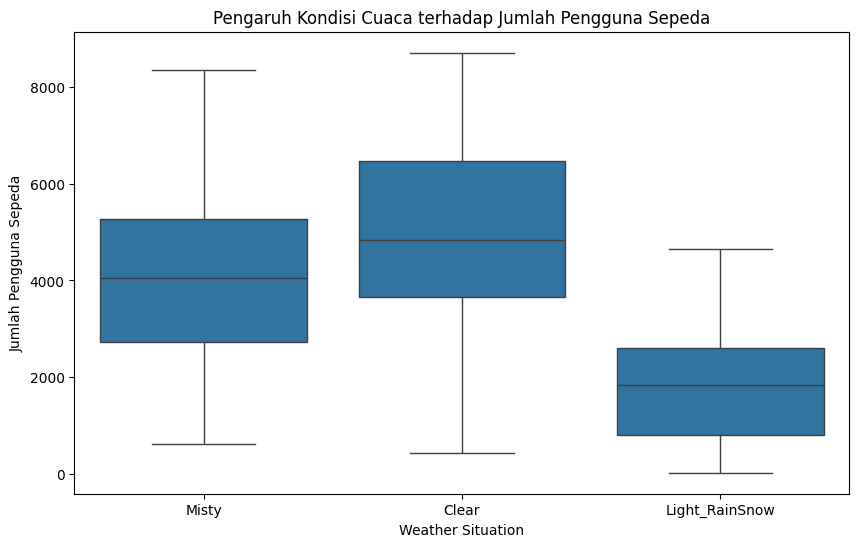

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_daily', y='cnt_daily', data=bike_df)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Weather Situation')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 3: Bagaimana tren penggunaan sepeda berdasarkan musim (season)?

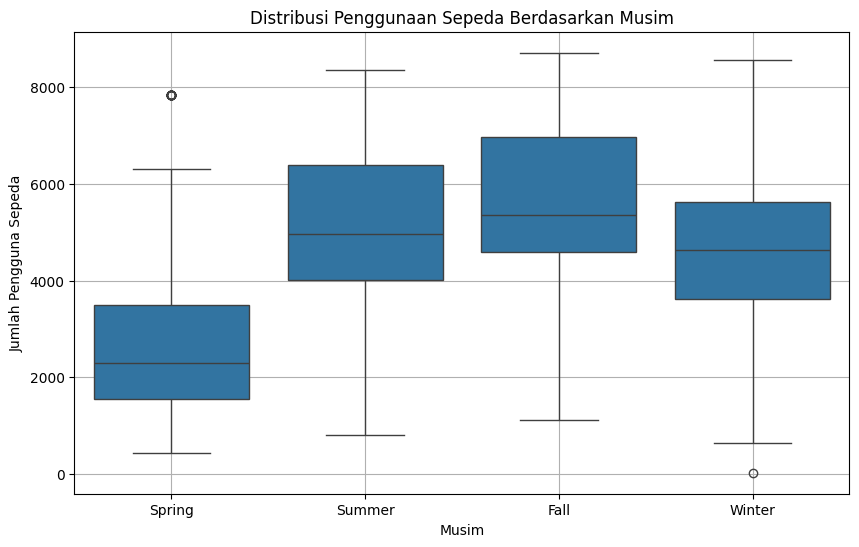

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season_daily', y='cnt_daily', data=bike_df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.grid(True)
plt.show()

### Pertanyaan 4: Pada jam berapa penggunaan sepeda paling tinggi?

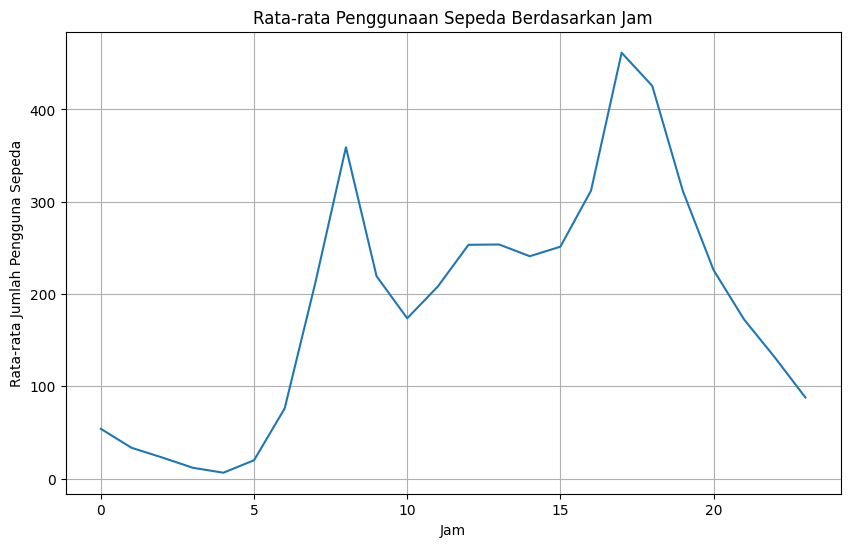

In [51]:
hourly_usage = bike_df.groupby('hr')['cnt_hourly'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.grid(True)
plt.show()

**Insight:**
- menjawab 4 pertanyaan melalui visualisasi data
- visualisasi terdiri dari bar, boxplot, dan line

## Conclusion

### Pertanyaan 1:
1. Berdasarkan grafik, terlihat bahwa jumlah rata-rata pengguna sepeda pada hari kerja lebih besar dibandingkan pada hari libur. Ini menunjukkan bahwa sepeda lebih sering digunakan pada hari kerja daripada pada hari libur.

2. Peningkatan penggunaan sepeda pada hari kerja mungkin terkait dengan penggunaan sepeda sebagai sarana transportasi oleh orang-orang yang bekerja, terutama di kota-kota yang mendukung penggunaan sepeda sebagai moda transportasi sehari-hari.

3. Meskipun penggunaan sepeda pada hari libur lebih rendah, tetap ada sejumlah besar pengguna. Hal ini mungkin menunjukkan bahwa sepeda juga digunakan untuk kegiatan rekreasional pada hari libur.

 

### Pertanyaan 2:
1. Penggunaan sepeda paling tinggi terjadi pada cuaca cerah (Clear). Terlihat dari box plot bahwa jumlah pengguna sepeda memiliki nilai tengah (median) yang lebih tinggi ketika cuaca cerah, dibandingkan dengan cuaca berkabut (Misty) dan saat hujan ringan atau salju (Light_RainSnow). Ini menunjukkan bahwa cuaca cerah merupakan kondisi yang paling mendukung untuk penggunaan sepeda.

2. Cuaca berkabut (Misty) memiliki distribusi jumlah pengguna sepeda yang cukup tinggi. Walaupun lebih rendah dibandingkan cuaca cerah, cuaca berkabut masih menunjukkan jumlah pengguna sepeda yang cukup besar, meskipun ada beberapa penurunan di beberapa hari tertentu. Namun, secara keseluruhan, masih ada minat menggunakan sepeda pada cuaca berkabut.

3. Cuaca dengan hujan ringan atau salju (Light_RainSnow) menunjukkan jumlah pengguna yang paling rendah. Penggunaan sepeda turun drastis saat kondisi cuaca melibatkan hujan ringan atau salju. Ini menunjukkan bahwa kondisi cuaca buruk sangat mempengaruhi keputusan orang untuk menggunakan sepeda.

### Pertanyaan 3:
1. Musim Gugur (Fall) menunjukkan tingkat penggunaan sepeda tertinggi. Box plot untuk musim ini memiliki median sekitar 5400 pengguna dan distribusi yang lebar, menandakan variabilitas tinggi dalam penggunaan. Ini mungkin disebabkan oleh cuaca yang nyaman dan suhu yang ideal untuk bersepeda.
   
2. Musim Panas (Summer) memiliki tingkat penggunaan yang hampir setara dengan Musim Gugur. Median penggunaan berada di sekitar 5000 pengguna, dengan sebaran data yang juga cukup lebar. Suhu yang hangat dan hari yang lebih panjang kemungkinan mendorong tingginya penggunaan sepeda di musim ini.

3. Musim Dingin (Winter) menunjukkan penggunaan moderat dengan median sekitar 4500 pengguna. Meskipun lebih rendah dari Musim Gugur dan Panas, masih ada penggunaan sepeda yang signifikan. Terdapat outlier di bagian bawah, menunjukkan ada hari-hari dengan penggunaan yang sangat rendah, mungkin karena kondisi cuaca ekstrem.

4. Musim Semi (Spring) memiliki tingkat penggunaan terendah dengan median sekitar 2300 pengguna. Ini mungkin disebabkan oleh cuaca yang tidak stabil dan kemungkinan hujan yang lebih sering. Namun, adanya outlier di bagian atas menunjukkan bahwa ada hari-hari tertentu dengan penggunaan yang sangat tinggi, mungkin saat cuaca cerah.

### Pertanyaan 4: 

1. Terdapat dua puncak utama penggunaan sepeda dalam sehari:
   - Puncak pagi hari sekitar jam 8-9, dengan rata-rata mencapai 350 pengguna
   - Puncak sore/malam hari sekitar jam 17-18 (5-6 PM), yang merupakan puncak tertinggi dengan rata-rata hampir 450 pengguna
     
     
2. Periode penggunaan terendah terjadi pada dini hari hingga pagi hari (jam 0-5):
   - Penggunaan mulai menurun drastis setelah jam 20 (8 PM)
   - Titik terendah terjadi sekitar jam 4-5 pagi dengan rata-rata kurang dari 50 pengguna
     
     
3. Terdapat pola yang jelas terkait dengan jam kerja:
   - Peningkatan tajam mulai jam 5 pagi hingga puncak pertama jam 8-9
   - Penurunan setelah jam 9 dan stabil di level menengah selama jam kerja (10-15)
   - Peningkatan signifikan lagi mulai jam 15 (3 PM) menuju puncak kedua
     

4. Pola ini sangat menunjukkan bahwa penggunaan sepeda sangat terkait dengan aktivitas commuting:
   - Puncak pagi bertepatan dengan waktu berangkat kerja/sekolah
   - Puncak sore bertepatan dengan waktu pulang kerja/sekolah
   - Level penggunaan moderat selama jam kerja menunjukkan adanya penggunaan untuk keperluan lain selain commuting

In [54]:
bike_df.to_csv("bike_df.csv", index=False)